# Universidad Internacional de La Rioja  

### Máster Universitario en Visual Analytics and Big Data  

---

### **Predicción y Análisis de la Demanda y Suministro de Productos entre la Comunidad Andina y España**  
**Presentado por:** Danilo Andrés Beleño Villafañe  

---

### **Notebook 4: Etapa de comprension de los datos - Analisis especifico**  


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.cloud import bigquery # Cliente de GCP

In [2]:
client = bigquery.Client()
table_id = "unir-predictiv0-andina-espana.datacomex.comex_comunidad_andina"

In [3]:
def create_chart(column_name, df):
    fig, axes = plt.subplots(2, 2, figsize=(6, 6)) 
    axes[0, 0].boxplot(df[column_name], vert=False, patch_artist=True, boxprops=dict(facecolor='royalblue'))
    axes[0, 0].set_title("Diagrama de Bigotes")
    axes[0, 0].set_xlabel(column_name)

    axes[0, 1].hist(df[column_name], bins=50, color='royalblue', edgecolor='black')
    axes[0, 1].set_title("Histograma de Datos")
    axes[0, 1].set_xlabel(column_name)
    axes[0, 1].set_ylabel("Frecuencia")

    sns.violinplot(x=column_name, data=df, ax=axes[1, 0], color='royalblue')
    axes[1, 0].set_title("Violin Plot - Distribución de Datos")

    axes[1, 1].scatter(range(len(df[column_name])), df[column_name], color='royalblue')
    axes[1, 1].set_title("Gráfico de Dispersión")
    axes[1, 1].set_xlabel("Índice")
    axes[1, 1].set_ylabel(column_name)

    plt.tight_layout()
    plt.show()
    
    
def get_bigquery_data(sql):
    query_job = client.query(sql)
    return query_job.to_dataframe()
    

### Explorando Euros

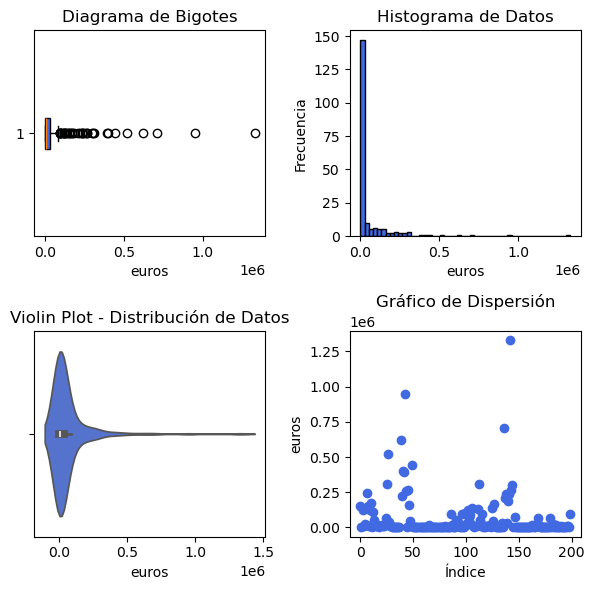

In [4]:
query = f"SELECT euros FROM `{table_id}` LIMIT 200"
df = get_bigquery_data(query)
create_chart('euros', df)

### Explorando Dolares

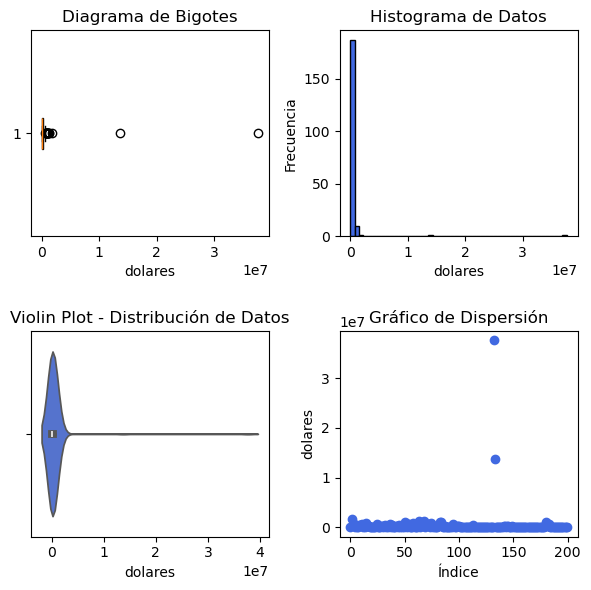

In [5]:
query = f"SELECT dolares FROM `{table_id}` LIMIT 200"
df = get_bigquery_data(query)
create_chart('dolares', df)

### Explorando kilogramos

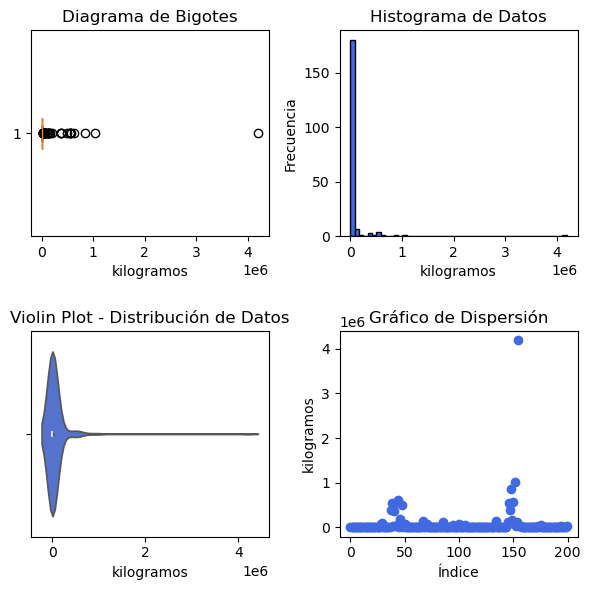

In [6]:
query = f"SELECT kilogramos FROM `{table_id}` LIMIT 200"
df = get_bigquery_data(query)
create_chart('kilogramos', df)